<a href="https://colab.research.google.com/github/Sizwe100/Python-Random-Forest/blob/main/Customer_Service_Satisfaction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
##Optimizing Loan Recovery

In [3]:
# Mount Google Drive if necessary
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
# Correct the file path to reflect mounted drive
source_folder = pd.read_csv("/content/drive/MyDrive/Customer_Service_Satisfaction/E-commerce_NPA_Dataset.csv")

# Correct the variable name to 'source_folder'
print(source_folder.head(3))


   CustomerID  Age  Gender  PurchaseAmount  PurchaseFrequency  \
0           1   38  Female      749.097626                 24   
1           2   30    Male      735.224916                 18   
2           3   55    Male     1145.520305                 22   

   ProductQualityRating  DeliveryTimeRating  CustomerServiceRating  \
0                     2                   1                      3   
1                     5                   4                      4   
2                     3                   5                      4   

   WebsiteEaseOfUseRating  ReturnRate  DiscountUsage LoyaltyProgramMember  
0                       5        0.12     135.392573                   No  
1                       5        0.37     193.450663                  Yes  
2                       1        0.10     147.246263                  Yes  


In [8]:
#lana i should Display General Statistics of the data
df = pd.DataFrame(source_folder)
summary = df.describe()
print (summary)

       CustomerID         Age  PurchaseAmount  PurchaseFrequency  \
count  500.000000  500.000000      500.000000         500.000000   
mean   250.500000   44.170000     1065.050731          14.308000   
std    144.481833   14.813777      583.199658           8.151197   
min      1.000000   18.000000       51.799790           1.000000   
25%    125.750000   32.000000      535.083407           7.000000   
50%    250.500000   44.000000     1100.884065          14.000000   
75%    375.250000   58.000000     1584.348124          22.000000   
max    500.000000   69.000000     1999.655968          29.000000   

       ProductQualityRating  DeliveryTimeRating  CustomerServiceRating  \
count             500.00000          500.000000               500.0000   
mean                2.93400            3.008000                 3.0780   
std                 1.41054            1.372481                 1.4156   
min                 1.00000            1.000000                 1.0000   
25%              

In [10]:
#Addidtional insights such as missing values, summary of categorical variables and correlational variables
print(df.isnull().sum())
print(df.describe(include = ["object"]))
#print (df.corr())

CustomerID                0
Age                       0
Gender                    0
PurchaseAmount            0
PurchaseFrequency         0
ProductQualityRating      0
DeliveryTimeRating        0
CustomerServiceRating     0
WebsiteEaseOfUseRating    0
ReturnRate                0
DiscountUsage             0
LoyaltyProgramMember      0
dtype: int64
        Gender LoyaltyProgramMember
count      500                  500
unique       2                    2
top     Female                  Yes
freq       266                  261


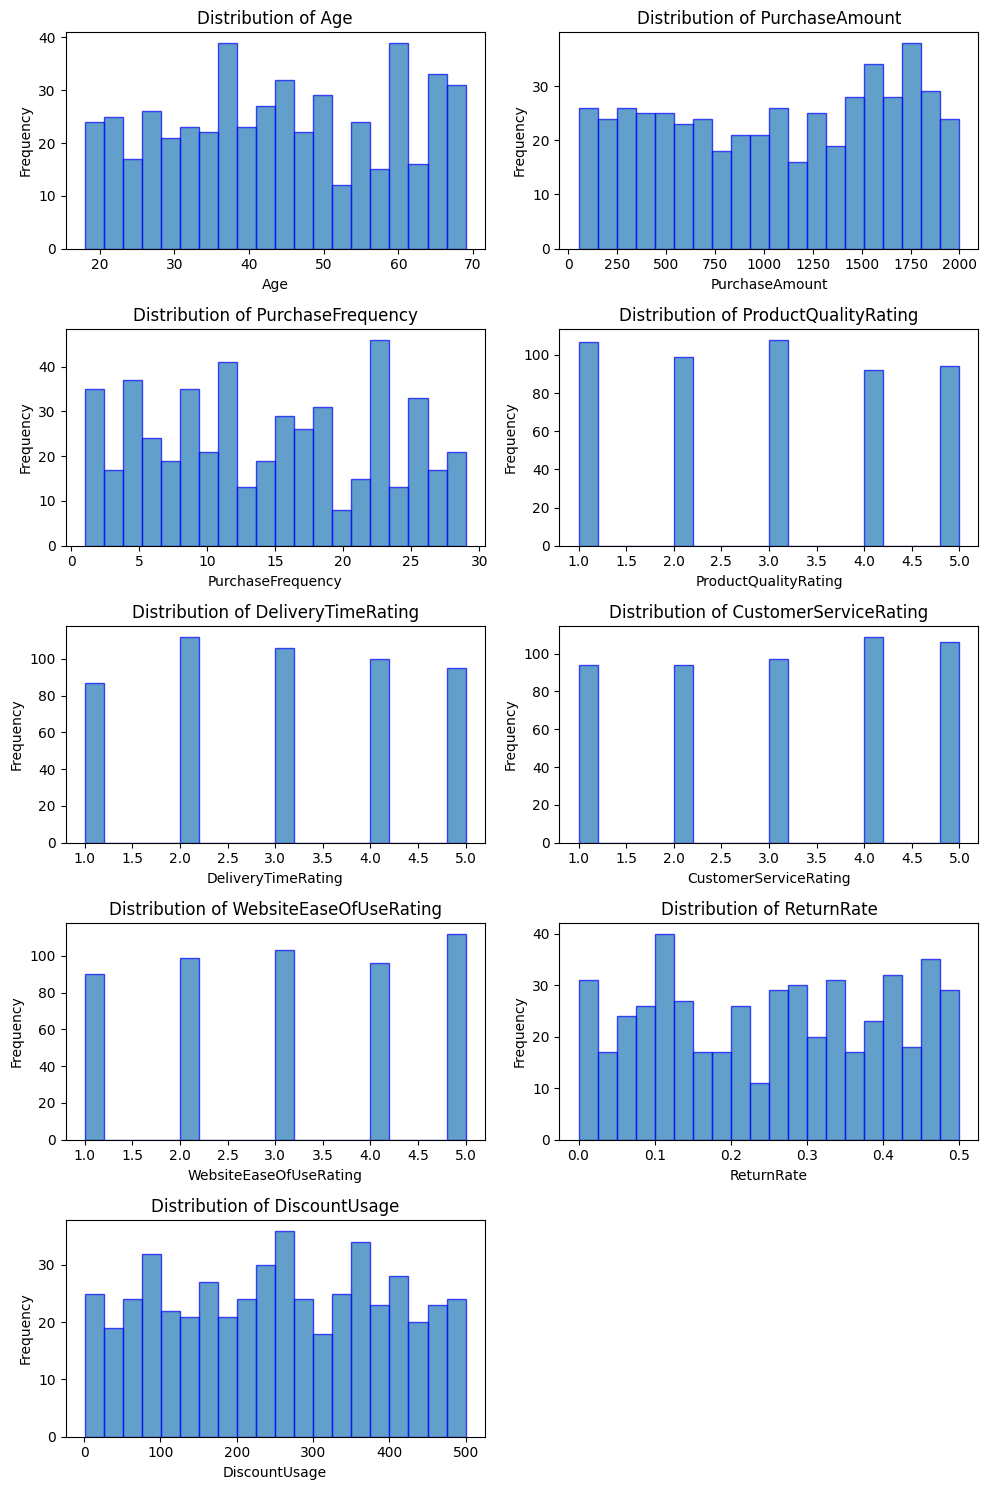

In [15]:
import matplotlib.pyplot as plt

numeric_cols = ['Age', 'PurchaseAmount', 'PurchaseFrequency', 'ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating', 'ReturnRate', 'DiscountUsage']

plt.figure(figsize=(10, 15))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 2, i)
    plt.hist(df[col], bins=20, edgecolor='b', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
# create age groups
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# select only the numeric columns for calculation
numeric_columns = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating']

# calculate mean ratings by age group and gender
mean_ratings_age_gender = df.groupby(['AgeGroup', 'Gender'])[numeric_columns].mean()

# reset the index to display the dataframe
mean_ratings_age_gender.reset_index(inplace=True)
print(mean_ratings_age_gender)

  AgeGroup  Gender  ProductQualityRating  DeliveryTimeRating  \
0    18-29  Female              3.052632            3.210526   
1    18-29    Male              2.933333            3.000000   
2    30-39  Female              2.929825            2.859649   
3    30-39    Male              3.080000            2.820000   
4    40-49  Female              3.090909            2.890909   
5    40-49    Male              2.857143            3.166667   
6    50-59  Female              2.945946            2.945946   
7    50-59    Male              2.833333            2.895833   
8    60-69  Female              2.900000            3.300000   
9    60-69    Male              2.673469            2.938776   

   CustomerServiceRating  WebsiteEaseOfUseRating  
0               3.175439                2.912281  
1               3.333333                3.355556  
2               2.912281                3.070175  
3               2.980000                2.880000  
4               3.036364                

<ipython-input-20-da32323ffb01>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ratings_age_gender = df.groupby(['AgeGroup', 'Gender'])[numeric_columns].mean()


In [22]:
# select only the numeric columns for calculation
numeric_columns = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating', 'ReturnRate', 'DiscountUsage']

# calculate mean ratings by loyalty program membership
mean_ratings_loyalty = df.groupby('LoyaltyProgramMember')[numeric_columns].mean()

# reset the index to display the dataframe
mean_ratings_loyalty.reset_index(inplace=True)
print(mean_ratings_loyalty)

  LoyaltyProgramMember  ProductQualityRating  DeliveryTimeRating  \
0                   No              2.920502            2.916318   
1                  Yes              2.946360            3.091954   

   CustomerServiceRating  WebsiteEaseOfUseRating  ReturnRate  DiscountUsage  
0               2.987448                3.108787    0.251883     241.426710  
1               3.160920                3.057471    0.252644     260.113108  


In [23]:
# define NPS categories based on customer service rating
df['NPS_Category'] = pd.cut(df['CustomerServiceRating'], bins=[0, 6, 8, 10], labels=['Detractors', 'Passives', 'Promoters'], right=False)

# calculate NPS
nps_counts = df['NPS_Category'].value_counts(normalize=True) * 100
nps_score = nps_counts['Promoters'] - nps_counts['Detractors']

nps_counts

,proportion
NPS_Category,
Detractors,100.0
Passives,0.0
Promoters,0.0


In [24]:
nps_score

-100.0

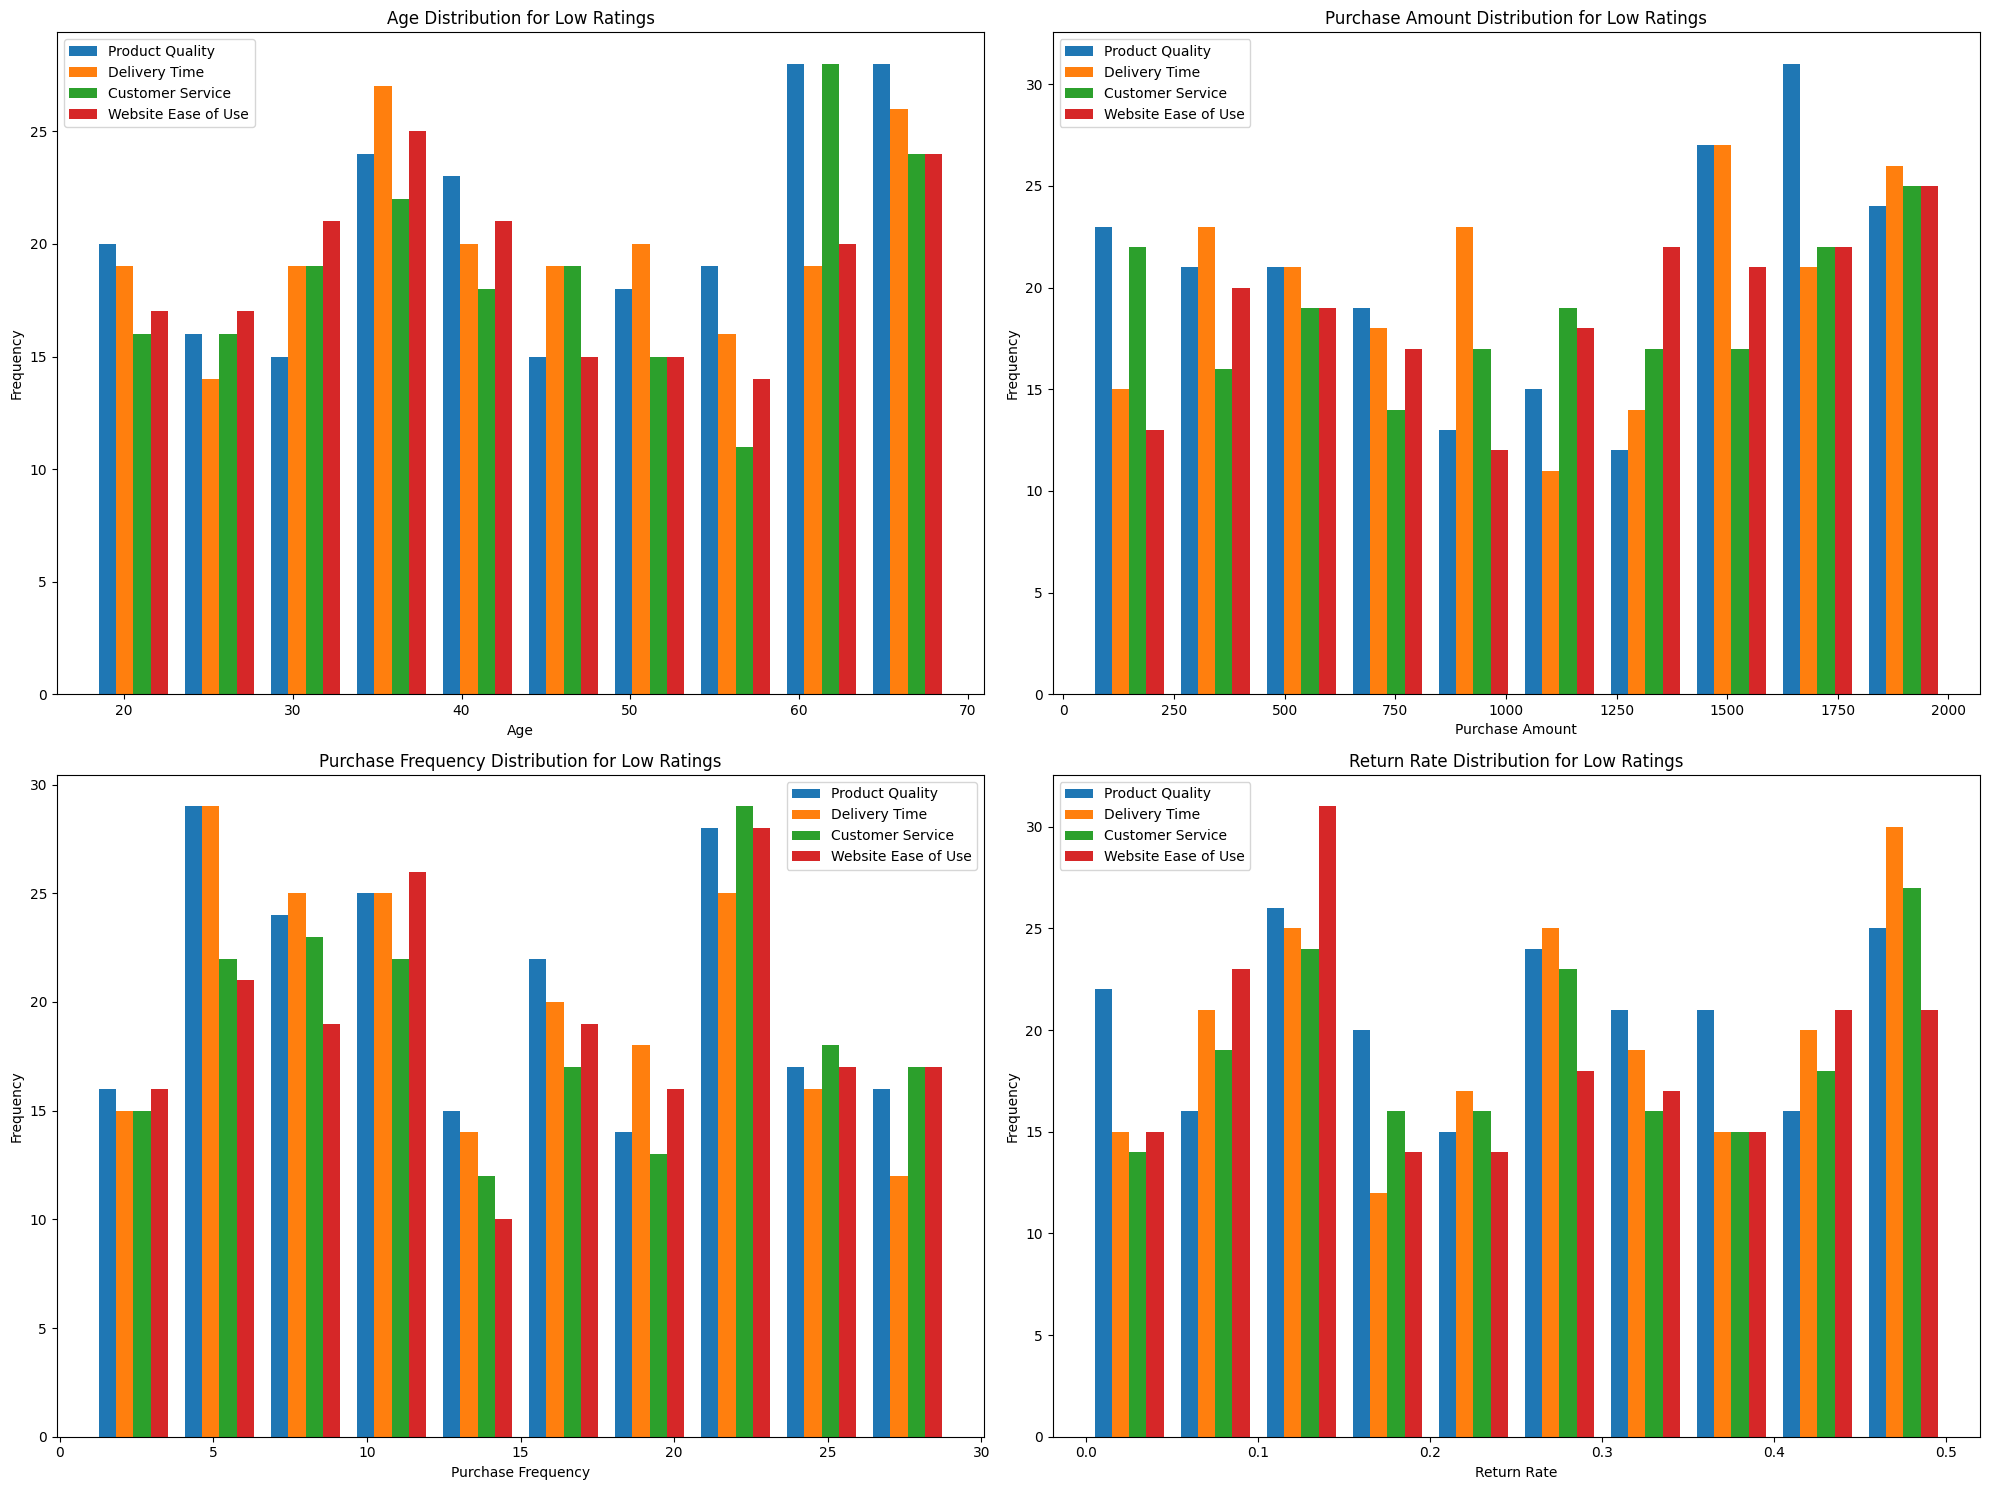

In [25]:
# define low rating threshold
low_rating_threshold = 2

# create subsets for low ratings in different aspects
low_product_quality = df[df['ProductQualityRating'] <= low_rating_threshold]
low_delivery_time = df[df['DeliveryTimeRating'] <= low_rating_threshold]
low_customer_service = df[df['CustomerServiceRating'] <= low_rating_threshold]
low_website_ease_of_use = df[df['WebsiteEaseOfUseRating'] <= low_rating_threshold]

# plot the characteristics for each low rating subset
plt.figure(figsize=(20, 15))

# age distribution for low ratings
plt.subplot(2, 2, 1)
plt.hist([low_product_quality['Age'], low_delivery_time['Age'], low_customer_service['Age'], low_website_ease_of_use['Age']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Age Distribution for Low Ratings')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# purchase amount distribution for low ratings
plt.subplot(2, 2, 2)
plt.hist([low_product_quality['PurchaseAmount'], low_delivery_time['PurchaseAmount'], low_customer_service['PurchaseAmount'], low_website_ease_of_use['PurchaseAmount']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Purchase Amount Distribution for Low Ratings')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.legend()

# purchase frequency distribution for low ratings
plt.subplot(2, 2, 3)
plt.hist([low_product_quality['PurchaseFrequency'], low_delivery_time['PurchaseFrequency'], low_customer_service['PurchaseFrequency'], low_website_ease_of_use['PurchaseFrequency']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Purchase Frequency Distribution for Low Ratings')
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')
plt.legend()

# return rate distribution for low ratings
plt.subplot(2, 2, 4)
plt.hist([low_product_quality['ReturnRate'], low_delivery_time['ReturnRate'], low_customer_service['ReturnRate'], low_website_ease_of_use['ReturnRate']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Return Rate Distribution for Low Ratings')
plt.xlabel('Return Rate')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#lana kshuthi i will build a K Mean clustering model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


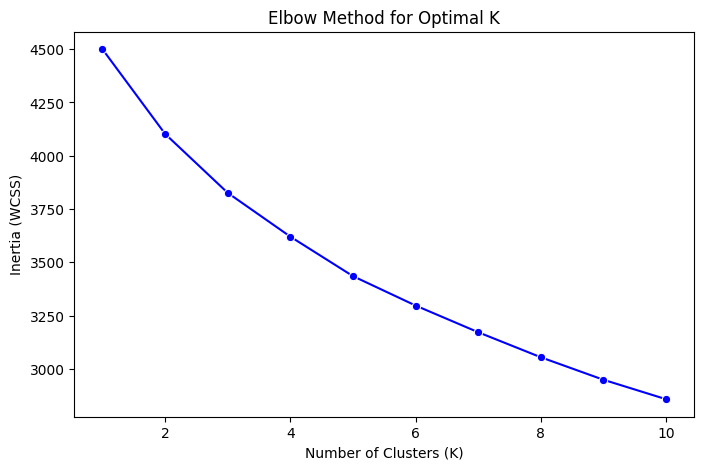

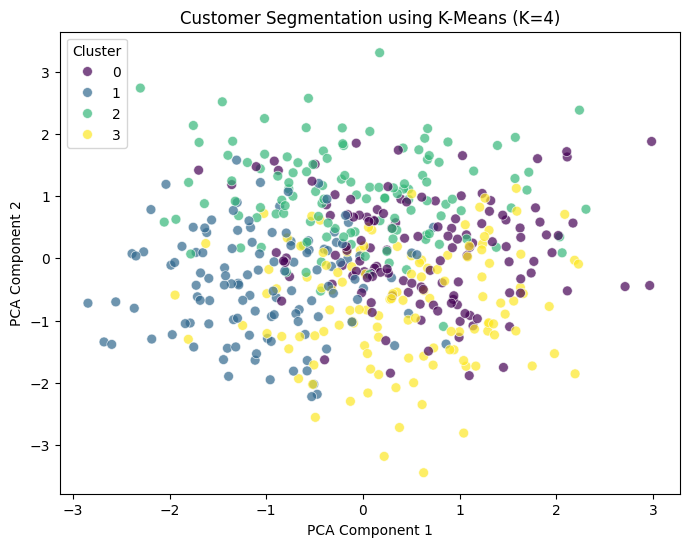

               Age  PurchaseAmount  PurchaseFrequency  ProductQualityRating  \
Cluster                                                                       
0        47.368421     1622.881124          14.864662              1.924812   
1        43.041322     1042.310404          11.768595              4.413223   
2        38.778689     1111.723629          14.090164              3.442623   
3        47.145161      443.002695          16.403226              2.072581   

         DeliveryTimeRating  CustomerServiceRating  WebsiteEaseOfUseRating  \
Cluster                                                                      
0                  2.924812               3.338346                3.022556   
1                  2.487603               3.280992                4.033058   
2                  3.770492               2.688525                2.163934   
3                  2.854839               2.983871                3.120968   

         ReturnRate  DiscountUsage  
Cluster            

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset from Google Drive
df = pd.read_csv("/content/drive/My Drive/Customer_Service_Satisfaction/E-commerce_NPA_Dataset.csv")

# Selecting relevant features for clustering
features = [
    "Age", "PurchaseAmount", "PurchaseFrequency", "ProductQualityRating",
    "DeliveryTimeRating", "CustomerServiceRating", "WebsiteEaseOfUseRating",
    "ReturnRate", "DiscountUsage"
]

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Finding optimal number of clusters using Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
sns.lineplot(x=k_values, y=inertia, marker="o", color="b")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Apply K-Means clustering with chosen K (e.g., K=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_data)

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df["PCA1"], df["PCA2"] = pca_data[:, 0], pca_data[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis", s=50, alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segmentation using K-Means (K=4)")
plt.legend(title="Cluster")
plt.show()

# Analyze cluster characteristics
cluster_summary = df.groupby("Cluster")[features].mean()
print(cluster_summary)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset from Google Drive
df = pd.read_csv("/content/drive/My Drive/Customer_Service_Satisfaction/E-commerce_NPA_Dataset.csv")

# Define target variable (Churn) - Example condition for churn
df["Churn"] = (df["ReturnRate"] > 0.5) | (df["PurchaseFrequency"] < 2)
df["Churn"] = df["Churn"].astype(int)  # Convert to binary 0 or 1

# Selecting relevant features for classification
features = [
    "Age", "PurchaseAmount", "PurchaseFrequency", "ProductQualityRating",
    "DeliveryTimeRating", "CustomerServiceRating", "WebsiteEaseOfUseRating",
    "ReturnRate", "DiscountUsage"
]
X = df[features]
y = df["Churn"]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00         5

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix:
 [[95  0]
 [ 0  5]]
